## Word2Vec
Word2Vec is a popular technique used in natural language processing to turn words into numerical vectors, so that computers can understand and work with text data. These vectors capture the meaning of words in such a way that similar words have similar vectors.

### How does Word2Vec work?
 Word2Vec uses a neural network to learn word relationships from a large amount of text. It does this by looking at the context in which words appear. There are two main ways Word2Vec can be trained: CBOW and Skip-gram.

### CBOW (Continuous Bag of Words):
 In CBOW, the model tries to predict a target word based on the words that come before and after it (the context). For example, given the sentence "the cat sits on the mat", if the context is ["the", "cat", "on", "the", "mat"], the model tries to predict the word "sits".

### Skip-gram:
 In Skip-gram, the model does the opposite: it takes a single word and tries to predict the words around it (the context). Using the same sentence, if the target word is "sits", the model tries to predict ["the", "cat", "on", "the", "mat"].

- In summary, CBOW predicts a word from its context, while Skip-gram predicts the context from a word.


In [3]:
!pip install gensim nltk

In [1]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

sentences = [
    "I love natural language processing",
    "Word embeddings are amazing",
    "I enjoy learning machine learning concepts",
    "Deep learning uses neural networks"
]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zainab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]
tokenized_sentences

[['i', 'love', 'natural', 'language', 'processing'],
 ['word', 'embeddings', 'are', 'amazing'],
 ['i', 'enjoy', 'learning', 'machine', 'learning', 'concepts'],
 ['deep', 'learning', 'uses', 'neural', 'networks']]

In [14]:
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=100,    # Dimension of word vectors
    window=5,          # Context window size
    min_count=1,       # Ignore words with frequency < 1
    workers=4,         # Parallel processing threads
    sg = 1             # 0 for CBOW (default), 1 for skip-gram
)

In [15]:
#PRINT VOCABULARY
vocab =model.wv.index_to_key
vocab

['learning',
 'i',
 'are',
 'love',
 'natural',
 'language',
 'processing',
 'word',
 'embeddings',
 'networks',
 'neural',
 'enjoy',
 'machine',
 'concepts',
 'deep',
 'uses',
 'amazing']

In [16]:
# Get vector for a word
vector = model.wv['learning']  # Returns 100-dim vector
print(f"Vector for 'learning':\n{vector[:5]}...")  # Show first 5 dimensions

Vector for 'learning':
[-0.00053595  0.00023651  0.00510366  0.00900947 -0.00930299]...


In [19]:
# Find most similar words
similar_words = model.wv.most_similar("learning", topn=3) #top3 based on cosine similarity
print("\nWords similar to 'learning':")
for word, score in similar_words:
    print(f"{word}: {score:.3f}")


Words similar to 'learning':
amazing: 0.219
networks: 0.216
machine: 0.093


In [ ]:
import gensim.downloader as api

# Download pre-trained model (~1.6GB)
google_model = api.load('word2vec-google-news-300')

# Example usage
similar_words = google_model.most_similar("computer", topn=3)
print("\nGoogle News model results for 'computer':")
print(similar_words)

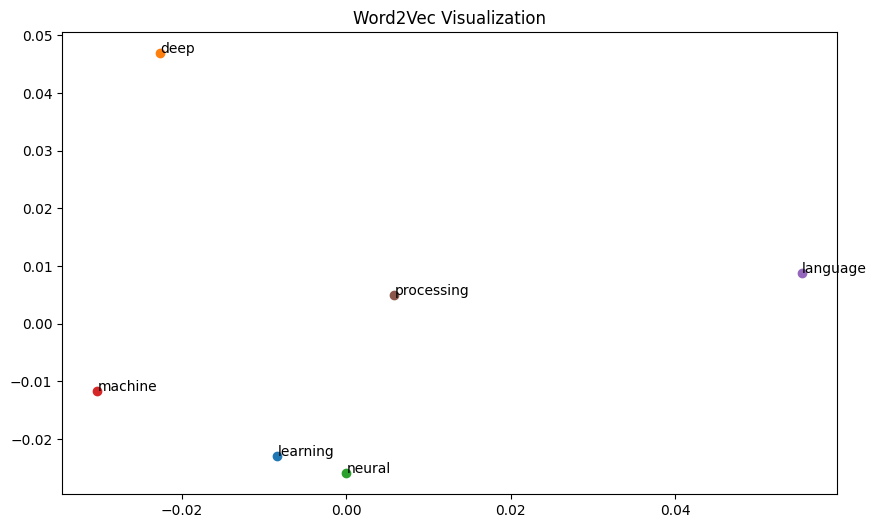

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get words and vectors
words = ["learning", "deep", "neural", "machine", "language", "processing"]
vectors = [model.wv[w] for w in words]

# Reduce to 2D
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10,6))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i,0], vectors_2d[i,1])
    plt.annotate(word, (vectors_2d[i,0], vectors_2d[i,1]))
plt.title("Word2Vec Visualization")
plt.show()

In [10]:
import numpy as np

def document_vector(model, doc):
    # Remove out-of-vocabulary words
    words = [w for w in doc if w in model.wv]
    if len(words) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[words], axis=0)

# Convert all documents to vectors
doc_vectors = [document_vector(model, doc) for doc in tokenized_sentences]
doc_vectors

[array([-4.9193189e-03,  2.3757902e-03, -8.2527910e-04, -1.3565359e-03,
         1.2341191e-03, -9.3848165e-04,  3.1186361e-03,  3.7547562e-03,
        -2.1259349e-03, -2.9685560e-03,  7.1259437e-04,  3.5466743e-05,
        -3.5656828e-03,  5.2548607e-04, -1.6588913e-04, -1.6746868e-03,
         3.1305975e-03,  1.7804892e-03, -1.3922907e-03, -1.8602908e-03,
        -6.0307060e-04, -3.6473549e-03,  8.6465767e-03,  3.5586681e-03,
        -2.2935572e-03,  9.9188951e-04,  6.5061171e-04, -1.6436559e-04,
        -1.3227996e-03,  2.4473253e-03,  5.9710513e-03, -1.1548849e-03,
        -2.3613621e-03, -4.4539617e-03,  2.0390779e-03,  3.2608281e-03,
         2.4409848e-03, -1.5545636e-06, -2.9518837e-04,  1.6499385e-03,
         5.9879245e-03, -4.3561487e-03, -2.3184738e-03, -7.2567293e-04,
         2.6128062e-03,  2.0541113e-03,  7.6700543e-04, -1.2352406e-03,
        -3.7804115e-04, -2.4016232e-03,  3.7188146e-03, -4.4554691e-03,
        -1.1883881e-04,  1.3324548e-04, -5.2533848e-03, -1.13743